<a href="https://colab.research.google.com/github/Srayoshi-Mirza/Customer-Segmentation-Unsupervised-Learning-/blob/main/customer_segmentation_Bottom_Up.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [161]:
#!pip install pandas

In [162]:
#!pip install scikit-learn

In [163]:
#!pip install matplotlib

In [164]:
#!pip install seaborn

In [165]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [166]:
#The dataset
df = pd.read_csv('https://raw.githubusercontent.com/Srayoshi-Mirza/Customer-Segmentation-Unsupervised-Learning-/main/Dataset/data.csv')  # from my github repository


# EDA

In [167]:
# Display the first few rows of the dataset
df.head()

,\tEmail,Address,Avatar,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,12.66,39.58,4.08,587.95
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,11.11,37.27,2.66,392.20
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,11.33,37.11,4.10,487.55
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,13.72,36.72,3.12,581.85
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,12.80,37.54,4.45,599.41


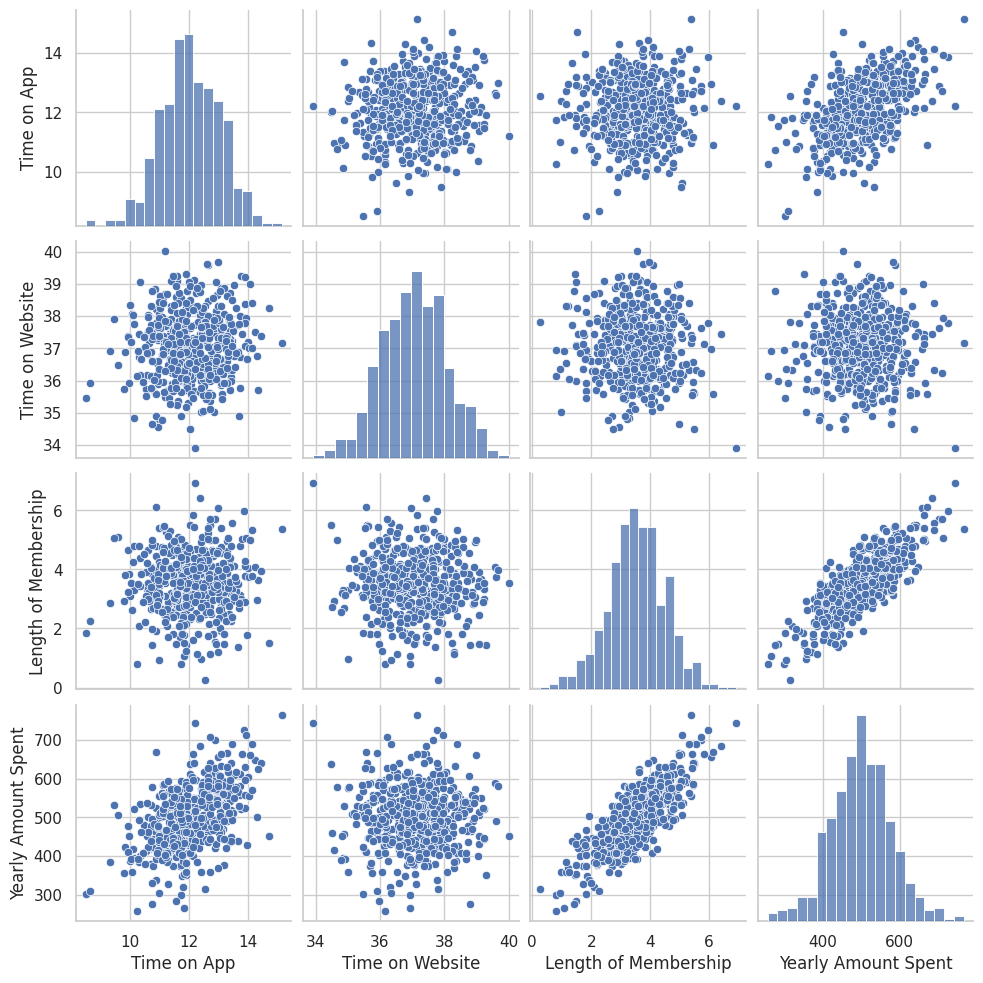

In [168]:
#Exploration and Visualization
sns.pairplot(df)
plt.show()

In [169]:
# Feature selection (for simplicity, excluding non-numeric columns)
X = df[['Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']]

# Clustering

Clustering is a process of grouping similar objects together; i.e., to partition unlabeled examples into disjoint subsets of clusters, such that:

*   Examples within a cluster are similar (in this case, we speak of high intraclass similarity).
*   Examples in different clusters are different (in this case, we speak of low interclass similarity).

Two kinds of inputs can be used for grouping:

1.  in similarity-based clustering, the input to the algorithm is an n × n dissimilarity matrix or distance matrix;
2.   in feature-based clustering, the input to the algorithm is an n × D feature matrix or design matrix, where n is the number of examples in the dataset and D the dimensionality of each sample.

Similarity-based clustering allows easy inclusion of domain-specific similarity, while feature-based clustering has the advantage that it is applicable to potentially noisy data.

# Types of Clustering Techniques

1.   Partitional algorithms

  These start with a random partition and refine it iteratively. Also known as “flat” clustering.
> For example, K-means clustering


2.   Hierarchical algorithms

 These organize the data into hierarchical structures, where data can be agglomerated in the bottom-up direction, or split in a top-down manner.

> For example, agglomerative clustering


---

# **Hierarchical Clustering**
Hierarchical clustering is a method of grouping similar data points into clusters. There are two main types:


1.   **Top-down divisive clustering algorithm:** This approach starts with all data points in one cluster and then divides it into smaller clusters.
2.   **Bottom-up agglomerative clustering algorithm:** This approach starts with each data point as a single cluster and merges the closest clusters until only one cluster remains.



# Bottom-Up Hierarchical Clustering

 Bottom-up hierarchical clustering, also known as agglomerative clustering, is an algorithm that starts with each data point as its own cluster and then merges the closest clusters until only one cluster remains. Here's a simplified explanation of the bottom-up hierarchical clustering algorithm:

1.   **Start with Each Point as a Cluster:** Consider each data point as a separate cluster at the beginning.
2.   **Measure Pairwise Dissimilarity:** Calculate the dissimilarity (distance) between all pairs of clusters. Common distance metrics include Euclidean distance or other similarity measures.
3.   **Identify Closest Pair of Clusters:** Find the two clusters that are most similar or have the minimum dissimilarity.
4.   **Merge Closest Clusters:** Combine (merge) the two closest clusters into a single cluster. This creates a new cluster that contains the data points from the merged clusters.
5.   **Update Dissimilarity Matrix:** Recalculate the dissimilarity between the new cluster and all remaining clusters.
6.   **Repeat Steps 3-5:** Continue the process by identifying the next closest pair of clusters and merging them. Update the dissimilarity matrix after each merge.
7. **Build Dendrogram:** Create a dendrogram, a tree-like diagram that represents the hierarchy of cluster mergers. The vertical lines in the dendrogram correspond to clusters, and the height at which clusters merge indicates their dissimilarity.
8. **Stop Criterion:** Continue merging clusters until only one cluster remains or until a stopping criterion is met. The stopping criterion could be a specific number of clusters, a threshold dissimilarity level, or other conditions.

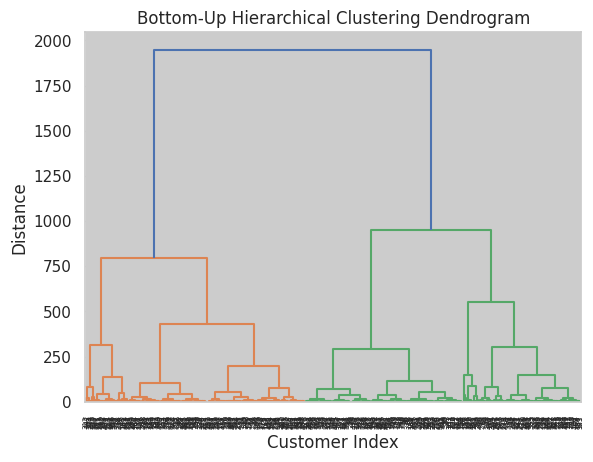

In [170]:
# Perform Hierarchical Clustering (Bottom-Up)
linkage_matrix = linkage(X, method='ward')  # Use 'ward' for bottom-up
dendrogram(linkage_matrix)
plt.title('Bottom-Up Hierarchical Clustering Dendrogram')
plt.xlabel('Customer Index')
plt.ylabel('Distance')
plt.show()

# **Visual Representation (Dendrogram):**
The result of bottom-up hierarchical clustering is often visualized as a dendrogram. The dendrogram provides a clear representation of the hierarchical structure, with each vertical line representing a cluster and the height of the merging indicating the dissimilarity.

In [171]:
# Choose the desired number of clusters and perform clustering
n_clusters_bottom_up = 5  # Adjust as needed
bottom_up_cluster = AgglomerativeClustering(n_clusters=n_clusters_bottom_up, linkage='ward')
df['Cluster'] = bottom_up_cluster.fit_predict(X)

In [172]:
# Create a mapping of cluster numbers to new names
cluster_names_bottom_up = {
    0: 'High-Spending, Engaged',
    1: 'Low-Spending, Moderate Engagement',
    2: 'Highest-Spending, Highly Engaged',
    3: 'Moderate-Spending, Moderate Engagement',
    4: 'Moderate-High Spending, Moderate Engagement'
}

In [173]:
df['Cluster'] = df['Cluster'].map(cluster_names_bottom_up)

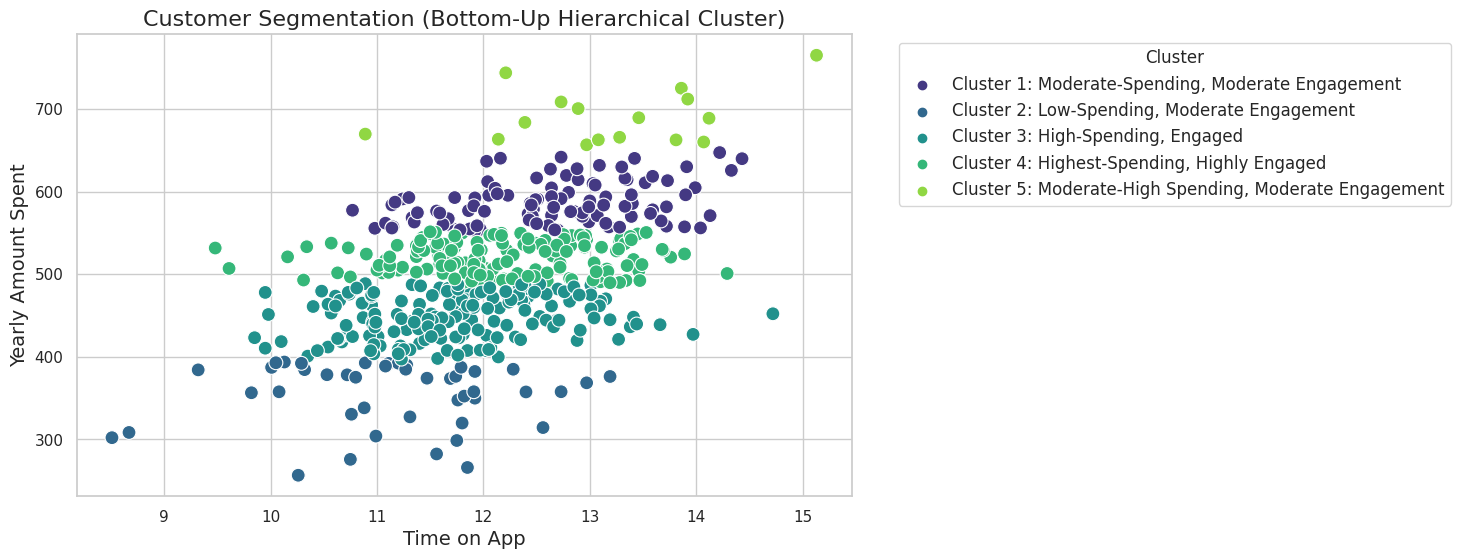

In [174]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a scatter plot using Seaborn
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='Time on App', y='Yearly Amount Spent', hue='Cluster', data=df, palette='viridis', s=100)

# Set plot title and labels
plt.title('Customer Segmentation (Bottom-Up Hierarchical Cluster)', fontsize=16)
plt.xlabel('Time on App', fontsize=14)
plt.ylabel('Yearly Amount Spent', fontsize=14)

# Move the legend outside the plot to avoid covering data points
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Cluster', fontsize=12)

# Customize the legend labels dynamically based on unique cluster names
legend_labels = [f'Cluster {i+1}: {label}' for i, label in enumerate(df['Cluster'].unique())]
scatter.legend_.set_title('Cluster')
for i, text in enumerate(scatter.legend_.texts):
    text.set_text(legend_labels[i])

# Show the plot
plt.show()

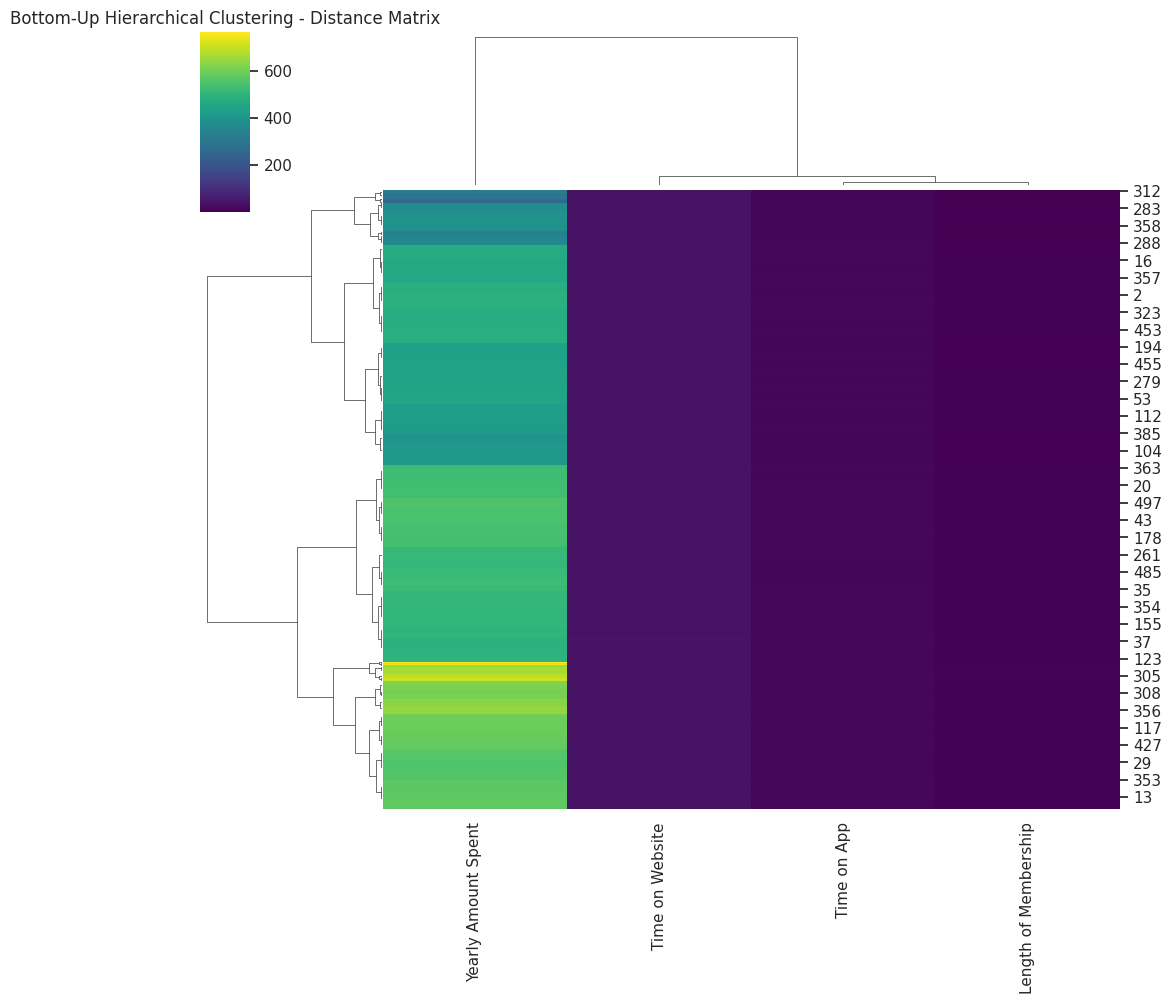

In [175]:
# Distance Matrix
sns.clustermap(X, method='ward', cmap='viridis')
plt.title('Bottom-Up Hierarchical Clustering - Distance Matrix')
plt.show()

# **Metrics to Measure Clustering Quality (Silhouette Coefficient)**

In [176]:
# Evaluation Metrics
silhouette_avg = silhouette_score(X, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.48642578251570223


This positive score indicates that, on average, the samples are closer to the members of their own cluster than they are to members of the neighboring clusters. A score of 0.48 is moderate but not extremely high. It suggests that there is some separation between clusters, but there might also be some overlap or ambiguity in the clustering.

The Silhouette Score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

Here's a breakdown of the Silhouette Score:


> 1.   **Near +1:** Indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. This is a desirable scenario.
2.   **Near 0:** Indicates that the object is on or very close to the decision boundary between two neighboring clusters.
3.   **Near -1:** Indicates that those samples might have been assigned to the wrong cluster.

In [177]:
# Export the data after Bottom-Up Hierarchical Clustering
df.to_csv('customer_segmentation_bottom_up.csv', index=False)